<h1><center><i>'Let's Netflix and Chill'</i></center></h1>

In [383]:
import pandas as pd
import seaborn as sns
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import __version__
from collections import Counter
from imdb import IMDb
ia = IMDb()



init_notebook_mode(connected=True)
cf.go_offline()


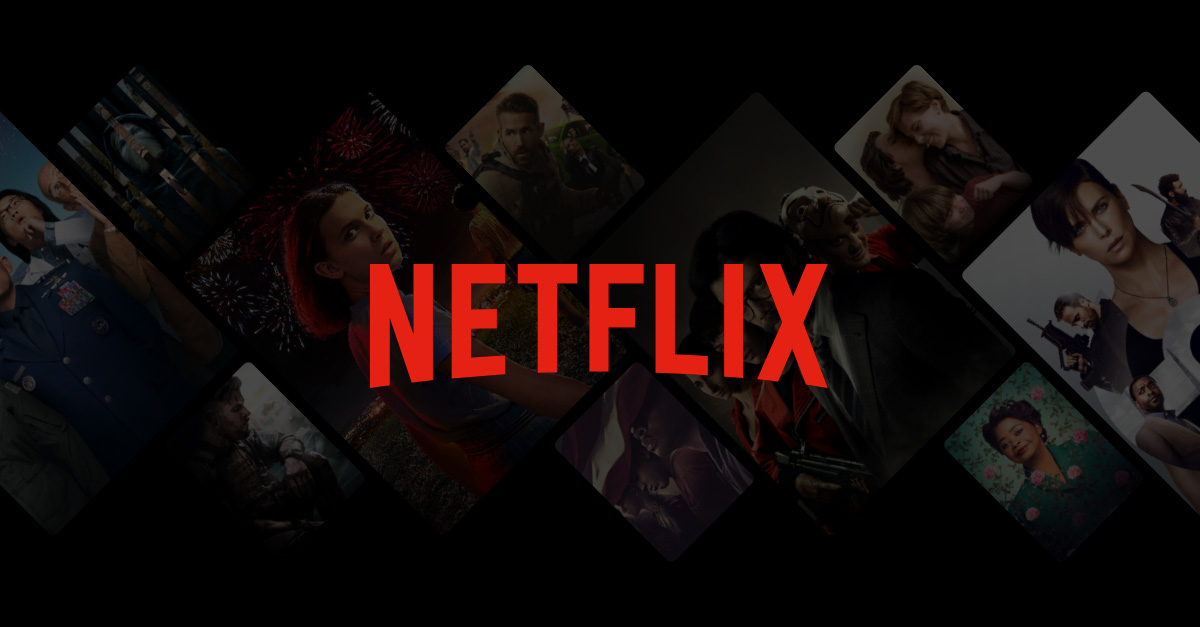

In [3]:
iurl='https://github.com/imamanmehrotra/Images_for_projects/raw/main/Netflix.jpeg'
from IPython.display import Image
Image(iurl)

In [178]:
url='https://raw.githubusercontent.com/imamanmehrotra/Datasets/main/netflix.csv'
df=pd.read_csv(url)
df.head(10)
    
    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


## Data Cleaning and Initial Level Analysis

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Out of 11 Features above only 1 is having INT data type and every other feature is of object type

In [180]:
print('Rows:',df.shape[0])
print('\n')
print('Columns:',df.shape[1])
print('\n')
print('Features/Column Names:',df.columns)
print('\n')
print('Unique Values:\n\n',df.nunique())
print('Null Values across columns:')
print(df.isna().sum())

Rows: 7787


Columns: 12


Features/Column Names: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Unique Values:

 show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64
Null Values across columns:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


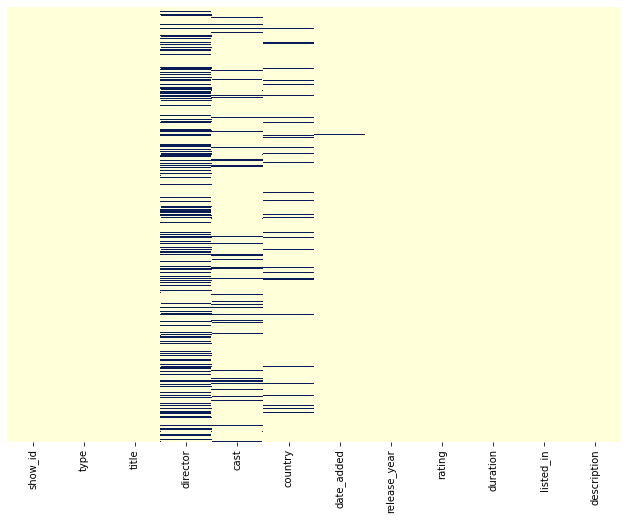

In [183]:
fig,axes=plt.subplots(figsize=[11,8])
fig=sns.heatmap(df.isna(),yticklabels=False ,cmap='YlGnBu',cbar=False )

## We have 10 values missing in Date Added Section. We can handle these missing values by performing MODE operation on Date added and replacing all the missing dates with the most occuring date.

In [184]:
#Top 10 dates
imp_dates=df['date_added'].value_counts().sort_values(ascending=False).head(10).to_frame()
imp_dates.iplot(kind='bar')

## From the above graph we can observe that maximum number(118) of content gets added to platform on January 1,2020 and also this would be our Mode value as well.Let's go ahead and replace missing values with Mode value

In [185]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
print('Null Values in column date_added:',df['date_added'].isna().sum())

Null Values in column date_added: 0


In [186]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


## We can determine the ratings on the basis of values in listed_in column

In [187]:
rt=df[['rating','listed_in']].value_counts()
rt.iplot(kind='scatter')

In [188]:
df.loc[ (df['rating'].isna()) & (df['listed_in']=='Movies'), ['rating']] = ['TV-MA']

In [189]:
df.loc[(df['listed_in'].str.contains('Kids')) & (df['rating'].isna()),['rating']]=['TV-Y7']

In [190]:
#The highest number of Rating in Dramas is for R, so we would go ahead and assign R as rating for missing values in Drama
df[(df['listed_in']=='Dramas')][['rating','listed_in']].groupby(by='rating').count().sort_values('listed_in',ascending=False)

,listed_in
rating,
R,38
PG-13,27
TV-MA,25
TV-14,9
PG,8
TV-PG,8
NR,1


In [191]:
df.loc[(df['listed_in'].str.contains('Dramas')) & (df['rating'].isna()),['rating']]=['R']

In [192]:
#The highest number of Rating in Anime Series, International TV Shows is for TV-14, so we would go ahead and assign TV-14 as rating for missing values in Drama
df[(df['listed_in']=='Anime Series, International TV Shows')][['rating','listed_in']].groupby(by='rating').count().sort_values('listed_in',ascending=False)

,listed_in
rating,
TV-14,34
TV-MA,32
TV-PG,6
TV-Y7,2


In [193]:
df.loc[(df['listed_in'].str.contains('Anime Series, International TV Shows')) & (df['rating'].isna()),['rating']]=['TV-14']

In [194]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


## Country Analysis for filling the missing country values:

In [195]:
ca=df[['type','country']].value_counts().head(20).groupby(['country','type']).sum().to_frame().reset_index()
ca.columns=['country','type','Content_Sum']
ca=ca.sort_values(by='Content_Sum',ascending=False)
ca

,country,type,Content_Sum
18,United States,Movie,1850
4,India,Movie,852
19,United States,TV Show,705
17,United Kingdom,TV Show,204
16,United Kingdom,Movie,193
8,Japan,TV Show,157
12,South Korea,TV Show,147
0,Canada,Movie,118
13,Spain,Movie,89
2,Egypt,Movie,89


In [196]:
fig=px.bar(data_frame=ca,x='country',y='Content_Sum',color='type')
fig.update_layout(
    title="Content across countries",
    xaxis_title="Country",
    yaxis_title="Number of Contents Produced",
    legend_title="Type",
    font=dict(family="fantasy",size=15))

## From the above Graph we can say that United States is the largest content producer in the world followed by India, and speaking precisely, India majorly produces movies and less of TV shows. We can therfore use this knowledge and try to fill in the missing values in Country Column based on this intel.

In [197]:
df.loc[(df['country'].isna()) & (df['type']=='TV Show'),['country']]=['United States']

In [198]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          230
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [199]:
s=df.loc[(df['country'].isna()) & (df['type']=='Movie')]
s

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",NaN,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ..."
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",NaN,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,NaN,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come..."
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."


In [200]:
def find_nth(string, substring, n):
    if (n == 1):
        return string.find(substring)
    else:
        return string.find(substring, find_nth(string, substring, n - 1) + 1)
    
id_list=[]
for name in s['title']: 
    movies = str(ia.search_movie(name))
    start_index=movies.find(':')+1
    end=find_nth(movies,'[',2)
    movie_id=movies[start_index:end]
    print(movie_id)
    id_list.append(movie_id)

6491068
0338490
10681664
13058374
12748256
6423540
13458584
0430239
13275228
[
7980006
9110340
[
[
9817308
[
[
[
[
[
0090685
1682886
8786466
3746808
13649688
[
5212160
4558532
10050766
[
[
[
2871384
[
[
[
13411942
6772700
8005338
[
[
[
[
10403090
2893780
6640526
10864124
13818410
[
9077188
5770836
2338287
[
[
13034092
[
2316411
13239776
9062342
[
11549746
12679522
8064392
13973370
6490792
[
[
12030516
7924798
9315418
7548570
9426212
[
[
[
13087566
10050782
0482610
6900644
11135936
10945950
10147546
1796960
2647258
7207006
4073952
0349260
5851908
[
4141822
12588160
9817258
0053965
[
9017614
7924866
9466100
[
[
7924764
8672310
[
[
[
[
8672310
[
0280851
9382396
0028950
[
[
8726442
2210581
0102315
10092590
[
[
[
12934616
[
11151836
[
[
11062058
9203030
[
[
11317462
[
10863904
4340322
2637378
7164714
6536944
[
6157190
4994736
11010054
0368323
11300422
0107659
2939898
9155740
9558946
9048794
[
[
7983794
6330514
10451914
11564842
1911658
[
8338746
13836494
[
13561310
[
[
[
[
[
13163048
105770

In [201]:
movie_ids=pd.DataFrame(id_list)
movie_ids.columns=['Movie_ID']
movie_ids.replace('[',np.nan, inplace=True)

In [202]:
movie_ids.index=s.index
movie_ids

,Movie_ID
67,6491068
97,0338490
117,10681664
178,13058374
179,12748256
...,...
7692,13538282
7719,8140738
7739,11489288
7765,2215797


In [203]:
s=pd.concat((s,movie_ids),axis=1)


In [204]:
s

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_ID
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,6491068
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,0338490
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...,10681664
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",NaN,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ...",13058374
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",NaN,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...,12748256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...,13538282
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,NaN,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come...",8140738
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",11489288
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",2215797


In [205]:
"""
from imdb import IMDb

# create an instance of the IMDb class
ia = IMDb()

# get a movie and print its director(s) and country of origin
the_matrix = ia.get_movie('13538282')
#for director in the_matrix['directors']:
#    print(director['name'])
country=the_matrix['countries']
print(country)

# show all information that are currently available for a movie
#print(sorted(the_matrix.keys()))

# show all information sets that can be fetched for a movie
#print(ia.get_movie_infoset())
"""

"\nfrom imdb import IMDb\n\n# create an instance of the IMDb class\nia = IMDb()\n\n# get a movie and print its director(s) and country of origin\nthe_matrix = ia.get_movie('13538282')\n#for director in the_matrix['directors']:\n#    print(director['name'])\ncountry=the_matrix['countries']\nprint(country)\n\n# show all information that are currently available for a movie\n#print(sorted(the_matrix.keys()))\n\n# show all information sets that can be fetched for a movie\n#print(ia.get_movie_infoset())\n"

In [206]:
from imdb import IMDb
c_list=[]
# create an instance of the IMDb class
ia = IMDb()

# get a movie and print its director(s)
for movie_id in s['Movie_ID']:
    try:
        ids = ia.get_movie(movie_id)
        country=ids['countries']
        print(country)
    except:
        country=np.nan
        print(country)
    
    c_list.append(country)

# show all information that are currently available for a movie
#print(sorted(the_matrix.keys()))

# show all information sets that can be fetched for a movie
#print(ia.get_movie_infoset())

nan
['India']
['Indonesia']
nan
nan
nan
['United States']
['United States']


2021-03-30 21:44:09,161 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Nigeria']
nan
nan


2021-03-30 21:44:16,754 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:44:16,756 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
nan


2021-03-30 21:44:20,048 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:44:20,050 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan
nan
nan
['United States']
['United Kingdom']
nan
['Egypt']


2021-03-30 21:44:42,007 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
['India']
nan


2021-03-30 21:44:57,248 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:44:57,249 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan


2021-03-30 21:45:00,135 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:45:00,136 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan
['United States', 'India', 'Ireland']
nan


2021-03-30 21:45:12,828 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:45:12,830 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

['United States']
nan
nan
nan
nan
nan
['Australia']
['United States']
['United States']


2021-03-30 21:45:33,578 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
['United Kingdom']
nan


2021-03-30 21:45:44,371 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:45:44,372 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
nan


2021-03-30 21:45:47,824 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
['Canada', 'Spain', 'France']
['Argentina']


2021-03-30 21:46:01,980 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Argentina']
nan
['France']
['France']
nan
['Spain']


2021-03-30 21:46:18,159 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:46:18,161 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
nan
['United States']
nan
nan
['India']


2021-03-30 21:46:35,004 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:46:35,009 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan
nan
nan
['United States']
nan
['Japan']
nan
['United States']
['United States']
['United States']
nan
['United States']
['United Kingdom', 'Ireland', 'South Africa']


2021-03-30 21:47:23,840 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
['United States']
nan
nan


2021-03-30 21:47:36,545 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
nan
nan


2021-03-30 21:47:49,177 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:47:49,179 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
nan
nan


2021-03-30 21:47:56,408 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:47:56,410 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

['India']
nan
nan
nan
nan


2021-03-30 21:48:02,074 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
['India']
nan


2021-03-30 21:48:12,415 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:48:12,416 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['France']
nan
nan
nan
['Egypt']
['United States']


2021-03-30 21:48:27,338 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:48:27,339 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan


2021-03-30 21:48:30,389 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan


2021-03-30 21:48:34,993 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:48:34,995 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
nan
['Mexico']


2021-03-30 21:48:44,060 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:48:44,061 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
nan


2021-03-30 21:48:47,404 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
['United Kingdom']
nan
['United States']
nan


2021-03-30 21:49:12,088 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
['South Korea']
['Turkey', 'Bosnia and Herzegovina', 'Serbia and Montenegro']
nan
['Philippines']
['Egypt']
['United States']
['India']
nan
nan


2021-03-30 21:49:48,588 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:49:48,590 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Thailand']
nan
nan
nan
nan
['Hungary', 'United States']
['United States']


2021-03-30 21:50:15,457 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
['India']


2021-03-30 21:50:22,666 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States', 'South Korea']
nan


2021-03-30 21:50:26,079 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:50:26,080 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 21:

nan
nan
nan
nan
nan
nan
['Egypt']
['United States']


2021-03-30 22:08:33,880 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt9046576/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': timeout('The read operation timed out')},); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 220, in retrieve_unicode
    response = uopener.open(url)
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/Users/aman_mehrotra/opt/anaconda3/

nan
nan
nan
['United States']
['United States']
nan


2021-03-30 22:09:02,107 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 22:09:02,108 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Peru']
nan
nan


2021-03-30 22:09:06,207 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
['Italy']
nan
nan
['United States']
nan
nan
nan
nan
['Canada', 'United States']
['Indonesia']
nan


2021-03-30 22:09:50,234 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States', 'Hong Kong']
nan
['United States']


2021-03-30 22:09:57,148 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Brazil']
nan
['Brazil']


2021-03-30 22:10:03,909 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
['United States']
nan


2021-03-30 22:10:13,859 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


nan
nan
['Colombia']
['United States']
['United States']


2021-03-30 22:10:30,426 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
['United States']
['United Kingdom']
['United States']


2021-03-30 22:10:50,134 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer
2021-03-30 22:10:50,135 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['Indonesia']
nan
nan
nan
nan


2021-03-30 22:11:02,385 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan
['United States']
['India']
['United States', 'Canada']


2021-03-30 22:11:18,213 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['India']
nan
['United States']
nan
nan


2021-03-30 22:11:35,328 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['South Korea']
nan
['United States']
nan
nan
nan


2021-03-30 22:11:56,806 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "nan": cannot convert float NaN to integer',); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 299, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: cannot convert float NaN to integer


['United States']
nan


In [207]:
country_find=pd.DataFrame(c_list, columns=['country'])
country_find.index=s.index
country_find
s['country']=country_find

In [208]:
s.isnull().sum()

show_id           0
type              0
title             0
director         40
cast             44
country         136
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
Movie_ID         73
dtype: int64

In [209]:
#We would now go ahead and replace the remaining NaN values in country with Mode value in country column
s

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_ID
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,6491068
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",[India],"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,0338490
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",[Indonesia],"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...,10681664
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",NaN,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ...",13058374
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",NaN,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...,12748256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...,13538282
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,NaN,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come...",8140738
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",11489288
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",[United States],"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",2215797


In [210]:
s['country'].fillna('United States', inplace=True)

In [211]:
s.isnull().sum()

show_id          0
type             0
title            0
director        40
cast            44
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
Movie_ID        73
dtype: int64

In [212]:
s=s.drop('Movie_ID',axis=1)
s

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",[India],"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",[Indonesia],"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",United States,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ..."
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",United States,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",United States,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,United States,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come..."
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",United States,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",[United States],"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."


In [213]:
#Orginal s frame
s

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",[India],"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",[Indonesia],"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",United States,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ..."
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",United States,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",United States,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,United States,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come..."
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",United States,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",[United States],"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."


In [214]:
#Original df frame
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [216]:
#Merge Experiment

In [217]:
s1=s.copy()

In [218]:
df1=df.copy()

In [220]:
s1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",[India],"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",[Indonesia],"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",United States,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ..."
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",United States,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",United States,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,United States,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come..."
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",United States,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",[United States],"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."


In [221]:
s1.country.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


United States                                              136
[United States]                                             37
[India]                                                     18
[United Kingdom]                                             4
[Egypt]                                                      4
[Indonesia]                                                  3
[France]                                                     3
[Argentina]                                                  2
[Brazil]                                                     2
[South Korea]                                                2
[Thailand]                                                   1
[Canada, Spain, France]                                      1
[Australia]                                                  1
[United States, Hong Kong]                                   1
[Hungary, United States]                                     1
[Peru]                                                 

In [222]:
new_list=[]
udf=lambda x:x.replace('[','').replace(']','').replace("'","")
for iv in s1.country:
    m=str(iv)
    s=udf(m)
    new_list.append(s)
    print(s)

United States
India
Indonesia
United States
United States
United States
United States
United States
Nigeria
United States
United States
India
United States
United States
United States
United States
United States
United States
United States
United States
United States
United Kingdom
United States
Egypt
United States
United States
India
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States, India, Ireland
United States
United States
United States
United States
United States
United States
United States
Australia
United States
United States
United States
United States
United Kingdom
United States
India
United States
United States
United States
United States
Canada, Spain, France
Argentina
Argentina
United States
France
France
United States
Spain
United States
United States
United States
United States
United States
United States
India
United States
United States
United States
United States
United States
Un

In [223]:
country=pd.DataFrame(new_list,columns=['country'])
country.index=s1.index

In [224]:
s1['country']=country

In [225]:
s1.country.value_counts()

United States                                            173
India                                                     18
Egypt                                                      4
United Kingdom                                             4
France                                                     3
Indonesia                                                  3
South Korea                                                2
Brazil                                                     2
Argentina                                                  2
Turkey, Bosnia and Herzegovina, Serbia and Montenegro      1
Colombia                                                   1
Hungary, United States                                     1
Mexico                                                     1
United States, Canada                                      1
United States, South Korea                                 1
Nigeria                                                    1
United Kingdom, Ireland,

In [226]:
s1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",India,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",Indonesia,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
178,s179,Movie,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore","Alan C. Lim, Smith Foreman, Maisie Benson, Ann...",United States,"October 2, 2020",2020,TV-Y,22 min,Children & Family Movies,"Cory, Chrissy and Freddie are on the hunt for ..."
179,s180,Movie,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo","Alan C. Lim, Smith Foreman, Abigail Vibat, Pfi...",United States,"August 4, 2020",2020,TV-Y,21 min,Children & Family Movies,Cory's spending the summer at Camp Friendship ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",United States,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,United States,"March 16, 2018",2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come..."
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",United States,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",United States,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."


In [227]:
df1.drop(s1.index, inplace=True)

In [228]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [229]:
df1=pd.concat((df1,s1), axis=0)

In [230]:
df1.sort_index(axis=0, inplace=True)

In [231]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [232]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [441]:
df1[df1['director'].isna()]['country'].value_counts().head(10).iplot(kind='bar')

In [722]:
show1=df1[df1['country']=='United States']['director'].value_counts().head(15)
show1.iplot(kind='bar', 
            layout=({'plot_bgcolor':'black'}),
            colors='Yellow'
        
           )

### So for all those cells where directors are missing specifically for USA, we would replace them with these top 15 directors.

In [235]:
df1[df1['country']=='United States']['director'].value_counts().head(15)

Marcus Raboy         16
Jay Karas            14
Jay Chapman          12
Ryan Polito           8
Martin Scorsese       8
Lance Bangs           8
Shannon Hartman       8
Troy Miller           6
Quentin Tarantino     6
Joey So               6
Steven Spielberg      6
Robert Rodriguez      6
Vlad Yudin            6
Michael Simon         5
Jay Roach             5
Name: director, dtype: int64

In [236]:
miss_dir_usa=df1.loc[(df1['director'].isna()) & (df1['country']=='United States')]

In [237]:
miss_dir_usa.loc[0:3500,'director']='Marcus Raboy'
miss_dir_usa.loc[3501:6000,'director']='Jay Karas'
miss_dir_usa.loc[6001:8000,'director']='Jay Chapman'

#miss_dir_usa.director.value_counts()



In [238]:
miss_dir_usa

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,Marcus Raboy,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
26,s27,TV Show,(Un)Well,Marcus Raboy,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...
29,s30,TV Show,#blackAF,Marcus Raboy,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,Marcus Raboy,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",United States,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
53,s54,TV Show,100 Humans,Marcus Raboy,"Zainab Johnson, Sammy Obeid, Alie Ward",United States,"March 13, 2020",2020,TV-14,1 Season,"Docuseries, Science & Nature TV",One hundred hardy souls from diverse backgroun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7735,s7736,TV Show,Young & Hungry,Jay Chapman,"Emily Osment, Kym Whitley, Rex Lee, Jonathan S...",United States,"June 21, 2017",2017,TV-14,5 Seasons,TV Comedies,A female food blogger is hired as a personal c...
7746,s7747,TV Show,دفعة القاهرة,Jay Chapman,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",United States,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7755,s7756,TV Show,Z Nation,Jay Chapman,"Nat Zang, Russell Hodgkinson, Michael Welch, A...",United States,"January 27, 2019",2018,TV-MA,5 Seasons,"TV Action & Adventure, TV Comedies, TV Horror",A team embarks on a perilous cross-country mis...
7777,s7778,TV Show,Zombie Dumb,Jay Chapman,NaN,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [239]:
df1=df1.drop(miss_dir_usa.index).reset_index(drop=True)

In [240]:
df1=pd.concat((df1,miss_dir_usa),axis=0)

In [241]:
df1.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7736,TV Show,Young & Hungry,Jay Chapman,"Emily Osment, Kym Whitley, Rex Lee, Jonathan S...",United States,"June 21, 2017",2017,TV-14,5 Seasons,TV Comedies,A female food blogger is hired as a personal c...
7783,s7747,TV Show,دفعة القاهرة,Jay Chapman,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",United States,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7784,s7756,TV Show,Z Nation,Jay Chapman,"Nat Zang, Russell Hodgkinson, Michael Welch, A...",United States,"January 27, 2019",2018,TV-MA,5 Seasons,"TV Action & Adventure, TV Comedies, TV Horror",A team embarks on a perilous cross-country mis...
7785,s7778,TV Show,Zombie Dumb,Jay Chapman,NaN,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


## Now we would Handle United Kingdom:

In [726]:
show2=df1[df1['country']=='United Kingdom']['director'].value_counts().head(15)
print(df1[df1['country']=='United Kingdom']['director'].value_counts().head(15))
show2.iplot(kind='bar',layout=({'plot_bgcolor':'black'}), colors='yellow', orientation='v', sortbars=True)

Edward Cotterill         119
Orlando von Einsiedel     55
Chris Howe                38
Alastair Fothergill        2
Ross Boyask                2
Nick Broomfield            2
Ben Wheatley               2
Cal Seville                2
Blair Simmons              2
Chris Bould                2
Daniel Kontur              2
Peter Orton                2
Matt Askem                 2
Cosima Spender             2
Matt Bell                  1
Name: director, dtype: int64


In [243]:
miss_dir_uk=df1.loc[(df1['director'].isna()) & (df1['country']=='United Kingdom')]

In [244]:
miss_dir_uk

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
18,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
52,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
76,s86,TV Show,21 Again,NaN,Laura Morgan,United Kingdom,"July 1, 2020",2019,TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s..."
241,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1, 2020",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
298,s322,TV Show,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...
...,...,...,...,...,...,...,...,...,...,...,...,...
6636,s7631,TV Show,Win the Wilderness,NaN,NaN,United Kingdom,"April 22, 2020",2020,TV-14,1 Season,"British TV Shows, International TV Shows, Real...",Six couples compete to prove they've got the s...
6650,s7646,TV Show,Witches: A Century of Murder,NaN,Suzannah Lipscomb,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Historian Suzannah Lipscomb investigates the w...
6669,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",2009,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
6670,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


In [245]:
miss_dir_uk.loc[0:3500,'director']='Edward Cotterill'
miss_dir_uk.loc[3501:5500,'director']='Orlando von Einsiedel'
miss_dir_uk.loc[5501:6729,'director']='Chris Howe'


In [246]:
df1=df1.drop(miss_dir_uk.index).reset_index(drop=True)
df1=pd.concat((df1,miss_dir_uk),axis=0)
df1.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7748,s7631,TV Show,Win the Wilderness,Chris Howe,NaN,United Kingdom,"April 22, 2020",2020,TV-14,1 Season,"British TV Shows, International TV Shows, Real...",Six couples compete to prove they've got the s...
7749,s7646,TV Show,Witches: A Century of Murder,Chris Howe,Suzannah Lipscomb,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Historian Suzannah Lipscomb investigates the w...
7750,s7669,TV Show,World War II in Colour,Chris Howe,Robert Powell,United Kingdom,"August 1, 2017",2009,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7751,s7670,TV Show,World's Busiest Cities,Chris Howe,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


## Now for remaining countries we will try to impute the missing values for directors with their mode.

In [247]:
#Function to impute the director Values:
def best_dir(c,df1):
    dn=df1[df1['country']==c]['director'].value_counts().head(1).to_dict()
    key, value = list(dn.items())[0]
    print('\n')
    print('For country {} the best director is {}'.format(c,key))
    df1.loc[(df1['director'].isna()) & (df1['country']==c),['director']]=[key]
    print('Missing Values for Director are imputed for',c)


In [248]:
for count in df1.loc[df1['director'].isna()]['country'].unique():
    try:
        best_dir(count,df1)
    except:
        pass



For country Brazil the best director is Lucas Margutti
Missing Values for Director are imputed for Brazil


For country Poland, United States the best director is Lukasz Kosmicki
Missing Values for Director are imputed for Poland, United States


For country Japan the best director is Toshiya Shinohara
Missing Values for Director are imputed for Japan


For country Turkey the best director is Hakan Algül
Missing Values for Director are imputed for Turkey


For country South Korea the best director is Sang-ho Yeon
Missing Values for Director are imputed for South Korea


For country Spain the best director is Daniel Calparsoro
Missing Values for Director are imputed for Spain


For country India the best director is David Dhawan
Missing Values for Director are imputed for India


For country Canada the best director is Justin G. Dyck
Missing Values for Director are imputed for Canada


For country Italy the best director is Francesco Imperato
Missing Values for Director are imputed fo


For country United States, Argentina the best director is Alejandro Agresti
Missing Values for Director are imputed for United States, Argentina


For country United States, France the best director is Fredric Lean
Missing Values for Director are imputed for United States, France


For country Saudi Arabia the best director is Faris Godus
Missing Values for Director are imputed for Saudi Arabia


For country United States, Russia the best director is Robert Rodriguez
Missing Values for Director are imputed for United States, Russia


For country United States, Sweden the best director is John Curran
Missing Values for Director are imputed for United States, Sweden


For country France, United Kingdom, United States the best director is Luc Besson
Missing Values for Director are imputed for France, United Kingdom, United States


For country Ireland, United Kingdom, United States the best director is Don Bluth, Gary Goldman, Dan Kuenster
Missing Values for Director are imputed for Irel

In [249]:
df1.isnull().sum()

show_id           0
type              0
title             0
director         94
cast            711
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [250]:
direc=[]
nf=df1[df1['director'].isna()]['country'].str.split(',')
for i in nf:
    print(i[0])
    direc.append(i[0])
    
  
#datetime.strptime(i,'%B %d, %Y')

United Kingdom
Germany
Mauritius
Finland
Canada
Japan
South Korea
Saudi Arabia
Norway
Finland
United Kingdom
Australia
United Kingdom
Canada
United Kingdom
Finland
United States
United States
United States
Spain
Austria
Italy
Germany
France
Chile
Canada
Canada
Taiwan
Jordan
United States
Mexico
Denmark
Denmark
Malaysia
Norway
South Korea
China
Uruguay
Turkey
Argentina
Italy
Netherlands
United Kingdom
United States
Puerto Rico
Norway
United States
United Kingdom
Germany
United States
Colombia
France
Canada
France
United States
United States
United States
United States
United States
Norway
South Korea
Senegal
Ukraine
Italy
United Kingdom
United States
France
Belarus
United States
Cyprus
United States
Brazil
France
Canada
Canada
Canada
India
Australia
Croatia
United States
Ukraine
Ireland
United States
Germany
Canada
United Kingdom
Canada
United Kingdom
United States
Belgium
United Kingdom
Russia
Japan
United States


In [251]:
sf=pd.DataFrame(direc, columns=['country'])
sf.index=nf.index
sf

,country
198,United Kingdom
307,Germany
308,Mauritius
468,Finland
549,Canada
...,...
6201,Belgium
6420,United Kingdom
6514,Russia
6543,Japan


In [252]:
sl=df1[df1['director'].isna()]

In [253]:
sl.drop('country',axis=1, inplace=True)

In [254]:
sl['country']=sf

In [255]:
sl.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'country'],
      dtype='object')

In [256]:
sl=sl[['show_id', 'type', 'title', 'director', 'cast','country','date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']]

In [257]:
sl

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
198,s217,Movie,A Plastic Ocean,NaN,Tanya Streeter,United Kingdom,"October 4, 2019",2016,TV-14,100 min,Documentaries,When he discovers the world's oceans brimming ...
307,s339,TV Show,Age of Tanks,NaN,NaN,Germany,"November 10, 2018",2017,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",The history of military tanks unfolds in a doc...
308,s340,TV Show,Agent,NaN,"Khumbulani Kay Sibiya, Sisanda Henna, Tarynn W...",Mauritius,"December 20, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas",A former footballer tries to make it as a play...
468,s524,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"March 16, 2019",2018,TV-Y7,3 Seasons,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
549,s616,TV Show,Atomic Puppet,NaN,"Eric Bauza, Lisa Norton, Carlos Díaz, Peter Ol...",Canada,"December 1, 2017",2016,TV-Y7,1 Season,"Crime TV Shows, Kids' TV, TV Comedies","Captain Atomic – once a superhero, now a sock ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6201,s7339,TV Show,Undercover,NaN,"Tom Waes, Anna Drijver, Frank Lammers, Elise S...",Belgium,"November 9, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...",Undercover agents infiltrate a drug kingpin's ...
6420,s7601,TV Show,White Lines,NaN,"Laura Haddock, Nuno Lopes, Marta Milans, Laure...",United Kingdom,"May 15, 2020",2020,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Zoe Walker leaves her quiet life behind to inv...
6514,s7717,Movie,Yoko and His Friends,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Russia,"June 23, 2018",2015,TV-Y,78 min,Children & Family Movies,"Vik meets new friends in a new city, where the..."
6543,s7751,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Japan,"May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...


In [258]:
df1.drop(sl.index, inplace=True)

In [259]:
df1=pd.concat([df1,sl], ignore_index=True)

In [260]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s7339,TV Show,Undercover,NaN,"Tom Waes, Anna Drijver, Frank Lammers, Elise S...",Belgium,"November 9, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...",Undercover agents infiltrate a drug kingpin's ...
7746,s7601,TV Show,White Lines,NaN,"Laura Haddock, Nuno Lopes, Marta Milans, Laure...",United Kingdom,"May 15, 2020",2020,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Zoe Walker leaves her quiet life behind to inv...
7747,s7717,Movie,Yoko and His Friends,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Russia,"June 23, 2018",2015,TV-Y,78 min,Children & Family Movies,"Vik meets new friends in a new city, where the..."
7748,s7751,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Japan,"May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...


In [261]:
def empty_check(data_frame):
    return data_frame.isnull().sum()

In [262]:
empty_check(df1)

show_id           0
type              0
title             0
director         94
cast            711
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [263]:
for count in df1.loc[df1['director'].isna()]['country'].unique():
    try:
        best_dir(count,df1)
    except:
        pass



For country United Kingdom the best director is Edward Cotterill
Missing Values for Director are imputed for United Kingdom


For country Germany the best director is Detlev Buck
Missing Values for Director are imputed for Germany


For country Canada the best director is Justin G. Dyck
Missing Values for Director are imputed for Canada


For country Japan the best director is Toshiya Shinohara
Missing Values for Director are imputed for Japan


For country South Korea the best director is Sang-ho Yeon
Missing Values for Director are imputed for South Korea


For country Saudi Arabia the best director is Faris Godus
Missing Values for Director are imputed for Saudi Arabia


For country Norway the best director is Henrik Martin Dahlsbakken
Missing Values for Director are imputed for Norway


For country Australia the best director is Clay Glen
Missing Values for Director are imputed for Australia


For country United States the best director is Marcus Raboy
Missing Values for Director

In [264]:
df1.loc[df1['director'].isna() & df1['country'].str.startswith('Ukr'),['director']]=['Sergey Loznitsa']
df1.loc[df1['director'].isna() & df1['country'].str.startswith('Fin'),['director']]=['Selma Vilhunen']
df1.loc[df1['director'].isna(),['director']]=['Yorgos Lanthimos']

In [265]:
cast_miss=df1[df1['cast'].isna()]
cast_miss

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
23,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
26,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
31,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...
47,s53,Movie,100 Days Of Solitude,Daniel Calparsoro,NaN,Spain,"July 6, 2018",2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...
...,...,...,...,...,...,...,...,...,...,...,...,...
7680,s2792,TV Show,Homemade,Esteban Vidal,NaN,Chile,"June 30, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",Acclaimed filmmakers from around the world cha...
7688,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Ole Bornedal,NaN,Denmark,"February 1, 2019",2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...
7693,s3858,TV Show,Magical Andes,Luis Ara,NaN,Uruguay,"October 15, 2019",2019,TV-G,1 Season,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu..."
7728,s6259,TV Show,The Cuba Libre Story,Thierry Donard,NaN,France,"December 8, 2016",2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...


In [93]:
sa=[]
import imdb
ia = imdb.IMDb()
for nm in df1[df1['cast'].isna()]['title'][:100]:
    try:
        search_results = ia.search_movie(nm)

        if search_results:
            movieID = search_results[0].movieID
            movie = ia.get_movie(movieID)
            if movie:
                cast = movie.get('cast')
                topActors = 5
                for actor in cast[:topActors]:
                    output=(nm,actor['name'])
                    output=list(output)
                    sa.append(output)
                    #print(output)
    except:
        pass

2021-03-30 15:27:03,121 CRITICAL [imdbpy] /Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt4205416/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': timeout('The read operation timed out')},); kwds: {}
Traceback (most recent call last):
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 221, in retrieve_unicode
    content = response.read()
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/http/client.py", line 464, in read
    return self._readall_chunked()
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/http/client.py", line 574, in _readall_chunked
    value.append(self._safe_read(chunk_left))
  File "/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/http/client.py", line 620, in _safe_read
    chunk = self.fp.read(min(amt, MAXAMOUNT)

In [101]:
ex=pd.DataFrame(sa, columns=['Movie','Cast'])
dfn=pd.DataFrame(ex.groupby('Movie')['Cast'].apply(lambda x:', '.join((x.values))))
dfn=dfn.reset_index()
dfn

,Movie,Cast
0,#Rucker50,Inez Dickens
1,#cats_the_mewvie,"Amanda Brennan, Mike Bridavsky, Lil Bub, Nala ..."
2,(T)ERROR,"Khalifah Ali Al-Akili, Mike Healey, Ali Kareem..."
3,13TH,"Melina Abdullah, Michelle Alexander, Cory Book..."
4,14 Minutes from Earth,"Alan Eustace, Jared Leidich, Taber MacCallum, ..."
...,...,...
155,Jack of all Trades,"Tony DeCamillis, Hunter Tylo, Joey Sculthorpe,..."
156,JingleKids,"Prokhor Chekhovskoy, Sergey Druzyak, Sofya Leb..."
157,Joe Cocker: Mad Dog with Soul,"Joe Cocker, Phil Crookes, Vic Cocker, Ray Char..."
158,John & Jane,"Glen Castinho, Sydney Fernandes, Oaref Irani, ..."


In [112]:
ia = imdb.IMDb()
for nm in df1[df1['cast'].isna()]['title'][700:750]:
    try:
        search_results = ia.search_movie(nm)

        if search_results:
            movieID = search_results[0].movieID
            movie = ia.get_movie(movieID)
            if movie:
                cast = movie.get('cast')
                topActors = 5
                for actor in cast[:topActors]:
                    output=(nm,actor['name'])
                    output=list(output)
                    sa.append(output)
                    print(output)
    except:
        pass

['The Repair Shop', 'Jay Blades']
['The Repair Shop', 'Steven Fletcher']
['The Repair Shop', 'William Kirk']
['The Repair Shop', 'Bill Paterson']
['The Repair Shop', 'Dominic Chinea']
['Three Wives One Husband', 'Anna Chancellor']
['Three Wives One Husband', 'Abel Morrison']
['Three Wives One Husband', 'Susie Morrison']
['Three Wives One Husband', 'Beth Morrison']
['Three Wives One Husband', 'Marina Morrison']
['Win the Wilderness', 'Nicholas Tennant']
['Age of Tanks', 'Rachel Williams']
['Age of Tanks', 'Damien Cochereau']
['Age of Tanks', 'Stephan Fiedler']
['Age of Tanks', 'Roman Kollmer']
['Age of Tanks', 'Jan Linnik']
['Homemade', 'Christopher Abbott']
['Homemade', 'Kumiko Kaur Chadha Berges']
['Homemade', 'Cate Blanchett']
['Homemade', 'Javier Cámara']
['Homemade', 'Bia Djassi']
['LEGO Ninjago: Masters of Spinjitzu: Day of the Departed', 'Vincent Tong']
['LEGO Ninjago: Masters of Spinjitzu: Day of the Departed', 'Kelly Metzger']
['LEGO Ninjago: Masters of Spinjitzu: Day of the De

In [130]:
ex=pd.DataFrame(sa, columns=['Movie','Cast'])
dfn=pd.DataFrame(ex.groupby('Movie')['Cast'].apply(lambda x:', '.join((x.values))))
dfn=dfn.reset_index()
dfn.columns=['title','cast_found']

In [266]:
dfn

,title,cast_found
0,#Rucker50,Inez Dickens
1,#cats_the_mewvie,"Amanda Brennan, Mike Bridavsky, Lil Bub, Nala ..."
2,(T)ERROR,"Khalifah Ali Al-Akili, Mike Healey, Ali Kareem..."
3,(Un)Well,Jennifer Julian
4,13TH,"Melina Abdullah, Michelle Alexander, Cory Book..."
...,...,...
565,Women Behind Bars,"Elspeth Ballantyne, Betty Bobbitt, Sheila Flor..."
566,Woodstock,"Richie Havens, Joan Baez, The Who, Sha-Na-Na, ..."
567,World's Most Wanted,"Jennifer Julian, Thomas Fuentes, Calogero Germ..."
568,XV: Beyond the Tryline,"Dan Carter, Sean Fitzpatrick, Bryan Habana, Ed..."


In [267]:
cast_miss

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
23,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
26,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
31,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...
47,s53,Movie,100 Days Of Solitude,Daniel Calparsoro,NaN,Spain,"July 6, 2018",2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...
...,...,...,...,...,...,...,...,...,...,...,...,...
7680,s2792,TV Show,Homemade,Esteban Vidal,NaN,Chile,"June 30, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",Acclaimed filmmakers from around the world cha...
7688,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Ole Bornedal,NaN,Denmark,"February 1, 2019",2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...
7693,s3858,TV Show,Magical Andes,Luis Ara,NaN,Uruguay,"October 15, 2019",2019,TV-G,1 Season,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu..."
7728,s6259,TV Show,The Cuba Libre Story,Thierry Donard,NaN,France,"December 8, 2016",2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...


In [268]:
new_df=pd.merge(cast_miss,dfn, on='title',how='left')

In [269]:
new_df.drop('cast',axis=1, inplace=True)

In [270]:
new_df.rename(columns={'cast_found':'cast'}, inplace=True)

In [271]:
new_df=new_df[['show_id', 'type', 'title', 'director', 'cast','country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']]

In [272]:
new_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s13,TV Show,1994,Diego Enrique Osorno,"Stefano Accorsi, Guido Caprino, Miriam Leone, ...",Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
1,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe","Khalifah Ali Al-Akili, Mike Healey, Ali Kareem...",United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
2,s31,Movie,#cats_the_mewvie,Michael Margolis,"Amanda Brennan, Mike Bridavsky, Lil Bub, Nala ...",Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
3,s36,Movie,#Rucker50,Robert McCullough Jr.,Inez Dickens,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...
4,s53,Movie,100 Days Of Solitude,Daniel Calparsoro,NaN,Spain,"July 6, 2018",2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...
...,...,...,...,...,...,...,...,...,...,...,...,...
706,s2792,TV Show,Homemade,Esteban Vidal,"Christopher Abbott, Kumiko Kaur Chadha Berges,...",Chile,"June 30, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",Acclaimed filmmakers from around the world cha...
707,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Ole Bornedal,"Vincent Tong, Kelly Metzger, Michael Adamthwai...",Denmark,"February 1, 2019",2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...
708,s3858,TV Show,Magical Andes,Luis Ara,NaN,Uruguay,"October 15, 2019",2019,TV-G,1 Season,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu..."
709,s6259,TV Show,The Cuba Libre Story,Thierry Donard,"Ken Eaken, Jaime Suchlicki, Jean-Pierre Clerc,...",France,"December 8, 2016",2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...


In [273]:
df1.drop(cast_miss.index, inplace=True)

In [274]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s7339,TV Show,Undercover,Wouter Bouvijn,"Tom Waes, Anna Drijver, Frank Lammers, Elise S...",Belgium,"November 9, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...",Undercover agents infiltrate a drug kingpin's ...
7746,s7601,TV Show,White Lines,Edward Cotterill,"Laura Haddock, Nuno Lopes, Marta Milans, Laure...",United Kingdom,"May 15, 2020",2020,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Zoe Walker leaves her quiet life behind to inv...
7747,s7717,Movie,Yoko and His Friends,Pavel Parkhomenko,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Russia,"June 23, 2018",2015,TV-Y,78 min,Children & Family Movies,"Vik meets new friends in a new city, where the..."
7748,s7751,TV Show,Yu-Gi-Oh! Arc-V,Toshiya Shinohara,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Japan,"May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...


In [275]:
df1=pd.concat([df1,new_df], ignore_index=True)

In [276]:
df1[df1['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7043,s53,Movie,100 Days Of Solitude,Daniel Calparsoro,NaN,Spain,"July 6, 2018",2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...
7044,s57,Movie,100 Years: One Woman's Fight for Justice,Melinda Janko,NaN,United States,"March 20, 2018",2016,TV-14,75 min,Documentaries,This documentary chronicles Elouise Cobell's l...
7047,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"June 15, 2019",2018,TV-PG,53 min,"Documentaries, Faith & Spirituality",A Muslim women's activist group in India prote...
7049,s147,Movie,A 3 Minute Hug,Everardo González,NaN,"Mexico, United States","October 28, 2019",2019,TV-PG,28 min,"Documentaries, International Movies",This documentary captures the joy and heartbre...
7059,s238,Movie,A Tale of Two Kitchens,Trisha Ziff,NaN,"United States, Mexico","May 22, 2019",2019,TV-PG,30 min,"Documentaries, International Movies",Mexico City restaurant star Gabriela Cámara op...
...,...,...,...,...,...,...,...,...,...,...,...,...
7732,s5117,Movie,Real Crime: Supermarket Heist (Tesco Bomber),Orlando von Einsiedel,NaN,United Kingdom,"August 15, 2016",2010,TV-14,46 min,Documentaries,"In 2000, U.K. detectives spent months tracking..."
7735,s5863,TV Show,Stunt Science,Orlando von Einsiedel,NaN,United Kingdom,"October 15, 2018",2018,TV-MA,1 Season,"British TV Shows, International TV Shows, Real...",When it comes to daring stunts and outrageous ...
7739,s6694,TV Show,The Murder Detectives,Chris Howe,NaN,United Kingdom,"March 31, 2017",2015,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",This series tracks the ups and downs of an 18-...
7741,s6839,TV Show,The Royal House of Windsor,Chris Howe,NaN,United Kingdom,"September 30, 2017",2017,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...","Drawing on newly available info, this show tra..."


In [277]:
#Function to impute the missing cast Values:
def best_cast(c,df1):
    db=df1[df1['country']==c]['cast'].value_counts().head(1).to_dict()
    key, value = list(db.items())[0]
    print('\n')
    print('For country {} missing cast imputed is {}'.format(c,key))
    df1.loc[(df1['cast'].isna()) & (df1['country']==c),['cast']]=[key]
    print('Missing Values for Cast are imputed for',c)

In [278]:
for count in df1.loc[df1['cast'].isna()]['country'].unique():
    try:
        best_cast(count,df1)
    except:
        pass



For country Spain missing cast imputed is Eduard Fernández, José Coronado, Marta Etura, Carlos Santos, Enric Benavent, Philippe Rebbot, Israel Elejalde, Tomás del Estal, Emilio Gutiérrez Caba
Missing Values for Cast are imputed for Spain


For country United States missing cast imputed is Jeff Dunham
Missing Values for Cast are imputed for United States


For country Canada missing cast imputed is Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath
Missing Values for Cast are imputed for Canada


For country Mexico, United States missing cast imputed is Juan Daniel García, Angelina Chen, Jonathan Espinoza, Coral Puente, Tania Alvarado, Fanny Tovar, Luis Leonardo Zapata, Yahir Alday, Leonardo Garza, Yocelin Coronado, Deyanira Coronado
Missing Values for Cast are imputed for Mexico, United States


For country United States, Mexico missing cast imputed is Esteban Berrones, Chris Birchfield, Mark Conway, Juana Dapa, Rich

In [279]:
empty_check(df1)

show_id          0
type             0
title            0
director         0
cast            13
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## From above dataframe we can observe that most of the movies are listed in Documentaries and hence this might be the reason that the cast is still missing for them. So we would go ahead and reaplce the NaN with 'Generic Character' in cast column

In [280]:
df1.loc[df1['cast'].isna(),['cast']]=['Generic Character']

In [281]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s2792,TV Show,Homemade,Esteban Vidal,"Christopher Abbott, Kumiko Kaur Chadha Berges,...",Chile,"June 30, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",Acclaimed filmmakers from around the world cha...
7746,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Ole Bornedal,"Vincent Tong, Kelly Metzger, Michael Adamthwai...",Denmark,"February 1, 2019",2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...
7747,s3858,TV Show,Magical Andes,Luis Ara,Natalia Oreiro,Uruguay,"October 15, 2019",2019,TV-G,1 Season,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu..."
7748,s6259,TV Show,The Cuba Libre Story,Thierry Donard,"Ken Eaken, Jaime Suchlicki, Jean-Pierre Clerc,...",France,"December 8, 2016",2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...


In [284]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [285]:
df1.to_csv('Netflix_Clean_Processed.csv')

In [290]:
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# EDA

## - Content According to Ratings

In [380]:
cr=pd.DataFrame(df1[['type','rating']].value_counts().groupby('rating').sum().sort_values(ascending=False)).reset_index()
cr.columns=['Ratings','Content_Count']
cr

,Ratings,Content_Count
0,TV-MA,2852
1,TV-14,1923
2,TV-PG,801
3,R,666
4,PG-13,386
5,TV-Y,276
6,TV-Y7,271
7,PG,247
8,TV-G,191
9,NR,84


In [733]:


fig=px.bar(cr,x='Ratings',y='Content_Count' ,color='Ratings')
fig.update_layout(
    title="Count of Content According to Ratings",
    xaxis_title="Ratings",
    yaxis_title="Count",
    legend_title="Rating Type",
    font=dict(family="Arial",size=15))

fig.layout.template = 'plotly_dark'
fig.show()





In [1130]:
fig = px.pie(cr, values='Content_Count', names='Ratings', title='% Distribution by Rating')
fig.layout.template = 'plotly_dark'
fig.show()

## From the above 2 graph, it's pretty evident that most of the content is meant for adult, so there are 2 insights out of this:

- Parents tend to buy other subscriptions for their children, where content is kid/children friendly
- Netflix should increase it's offering in Kids section as well, to increase the market share and coverage.

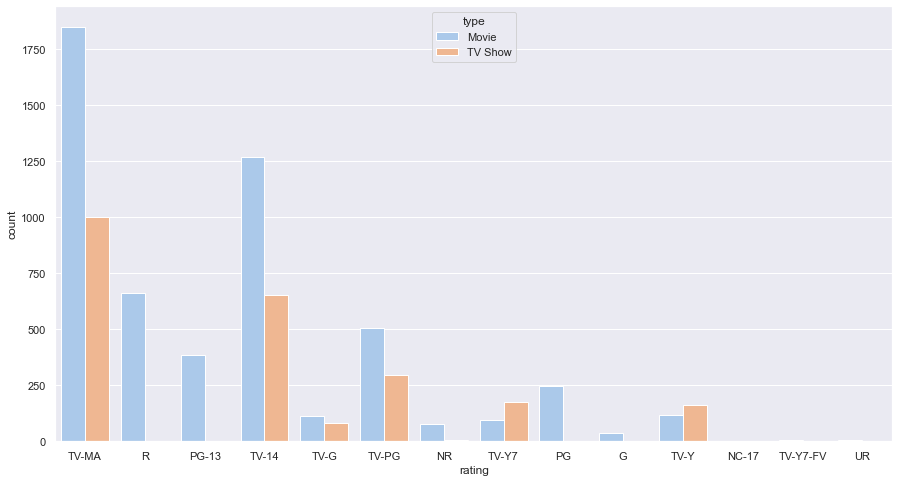

In [779]:
fig,axes=plt.subplots(figsize=[15,8])
sns.countplot(x=df1['rating'],
              hue=df1['type'],
              palette="pastel",
              ax=axes,hue_order=['Movie','TV Show']
              
             );


# 10 most frequently appearing directors across the platform, irrespective of country:

In [1114]:
dirct=df1[['director','country']].value_counts().head(10)
fig=dirct.iplot(kind='bar', 
            color='Yellow',
            layout=({'plot_bgcolor':'black', 'paper_bgcolor':'black', 'font_color':'#ADD8E6'}), 
            colors='Yellow',
            title='10 Most Frequently Appearing Directors across the world',
            yTitle='Number of movies Directed',
            xTitle='Directors')



In [1069]:
fig=px.histogram(df['type'],
                 color=df['type'],
                 color_discrete_map={
                     "TV Show":"#ADD8E6",
                     "Movie":"Yellow"},
                 labels=[] 
                
                )

fig.update_layout(
    title="Count of Different Kind of Content on Netflix",
    xaxis_title="Type of Content",
    yaxis_title="Count",
    legend_title="Type",
    font=dict(
        family="Helvetica",
        size=13))

fig.layout.template = 'plotly_dark'

fig.show()

In [1065]:
color=['#ADD8E6','Yellow']
trace=go.Pie(values=df1['type'].value_counts(),
             labels=['Movie','TV Show'],
             marker=dict(colors=color, line=dict(color="#2d2d2d", width=2)),
             title='% Distribution',
             titleposition='bottom center'
             
            )
fig=go.Figure(data=[trace])
fig.layout.template = 'plotly_white'

iplot(fig)

# Rising Popularity of Netflix across Years:

In [496]:
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [495]:
#df["date_added"] = pd.to_datetime(df['date_added'])
#df['day_added'] = df['date_added'].dt.day
#df['year_added'] = df['date_added'].dt.year
#df['month_added'] = df['date_added'].dt.month
#df['year_added'].astype(int);
#df['day_added'].astype(int);

In [498]:
df1['date_added']=pd.to_datetime(df1['date_added'])

In [500]:
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [505]:
df1['Day_Added']=df1['date_added'].dt.day

In [508]:
df1['Month_Added']=df1['date_added'].dt.month

In [510]:
df1['Year_Added']=df1['date_added'].dt.year

In [825]:
ya=df1['Year_Added'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year_Added':'Count'})

## Be careful with the release year and year added, release year basically tells the year in which the content is released, year added signifies the year on which the content got added to the platform i.e. Netflix

- Content Addition By Year

In [1068]:
fig=px.bar(data_frame=ya,x='Count',y='Year',
       orientation='h',
       color='Year',
       color_continuous_scale=px.colors.sequential.Darkmint_r)

fig.add_scatter(x=ya['Count'],y=ya['Year'],marker={'color':'yellow'}, showlegend=False)

fig.update_layout(
    title="Addition of Content on Netflix by Year",
    xaxis_title="Count of Contents",
    yaxis_title="Year",
    legend_title="Year",
    font=dict(
        family="Helvetica",
        
        size=13))

fig.layout.template = 'plotly_dark'

fig.iplot()

In [1123]:
cy=df1['release_year'].value_counts().head(20).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'Year','release_year':'Count'})


fig=px.bar(data_frame=cy,x='Count',y='Year',
       orientation='h',
       color='Year',
       color_continuous_scale=px.colors.sequential.Darkmint_r)

fig.add_scatter(x=cy['Count'],y=cy['Year'],showlegend=False, marker={'color':'yellow'})

fig.update_layout(
    title="Release of Content on Netflix by Year",
    xaxis_title="Count of Contents",
    yaxis_title="Year",
    legend_title="Year",
    font=dict(
        family="Helvetica",
        size=13))

fig.layout.template = 'plotly_dark'

fig.iplot()


In [868]:
s=[]
for i in range(0,len(df1)):
    a=datetime.datetime.strptime(df1['date_added'].astype(str)[i], '%Y-%m-%d').weekday()
    #print(a)
    s.append(a)

4
4
3
3
2
5
0
4
0
4
4
4
4
3
6
2
4
5
5
5
5
3
1
2
3
6
4
2
5
5
4
4
1
4
4
3
1
5
4
4
5
5
0
4
3
3
3
0
5
6
2
5
4
4
4
4
6
4
0
5
5
1
4
3
4
1
5
3
3
5
0
6
1
1
2
5
1
1
0
5
3
3
3
4
1
6
4
4
3
3
4
2
4
3
5
5
6
4
3
1
5
4
0
4
3
4
1
2
6
1
3
2
3
4
4
2
1
3
5
3
4
5
6
0
4
2
0
1
4
2
2
4
3
4
1
2
6
6
6
5
4
6
6
0
2
5
4
1
6
4
4
1
6
1
4
1
2
0
1
4
0
0
1
5
2
5
0
3
1
5
3
5
6
3
6
3
5
1
3
4
2
4
4
6
2
5
1
4
2
0
6
1
5
4
4
6
4
1
5
2
2
4
4
1
4
6
4
0
3
2
3
3
0
1
0
4
3
2
2
1
3
0
4
3
3
3
1
6
3
0
1
2
0
3
3
4
1
1
4
3
4
1
1
3
5
5
4
3
0
1
0
5
0
3
5
4
2
1
1
5
4
1
2
1
1
1
2
3
3
5
2
1
6
3
2
5
3
5
5
3
3
2
4
0
1
3
3
3
1
3
6
3
1
6
6
1
1
4
6
1
4
1
5
3
4
4
3
1
5
2
5
3
3
4
3
3
2
1
2
4
6
4
4
0
0
3
4
1
4
4
1
4
0
3
4
0
4
1
1
5
4
1
4
2
4
3
5
4
3
2
5
6
4
3
1
1
2
0
3
1
4
1
0
5
1
1
4
4
3
4
4
2
2
2
1
2
4
5
0
1
6
4
4
4
0
4
5
3
1
1
6
6
6
6
3
3
2
4
2
6
4
3
3
3
4
3
1
4
2
4
1
0
6
1
1
1
2
6
6
1
0
5
5
4
1
1
4
1
3
3
3
4
4
4
2
0
1
4
0
6
1
4
0
4
1
2
1
3
1
1
4
6
6
1
4
4
4
0
5
4
6
1
2
2
1
0
4
3
4
2
2
1
0
5
3
4
2
1
6
0
2
4
2
6
2
2
3
6
4
2
6
5
4
3
5
3
2
3
4
1


6
1
6
4
4
3
3
3
1
2
3
0
2
1
1
6
4
0
0
4
4
1
4
4
2
0
6
1
4
2
1
3
4
1
1
3
0
3
4
6
5
2
1
6
3
3
5
3
5
1
0
0
0
5
4
3
4
3
3
4
1
4
0
4
3
4
1
0
5
4
4
1
6
4
5
1
1
5
6
4
6
3
5
4
0
6
0
2
5
3
3
1
1
3
2
3
2
4
1
5
2
3
3
3
3
2
4
3
2
2
6
5
6
4
3
3
3
6
1
6
1
0
5
6
2
0
0
6
4
4
1
1
1
2
6
0
2
6
3
3
4
3
0
5
2
2
2
2
5
5
2
5
5
1
4
4
0
4
4
4
1
4
1
6
4
0
5
4
4
4
4
5
4
1
4
2
3
4
6
5
5
3
4
6
4
4
0
1
4
4
5
6
5
0
2
0
6
3
3
4
3
3
5
4
1
3
0
2
4
5
2
2
3
4
4
1
0
4
4
0
4
2
1
4
2
3
3
3
4
1
3
0
0
6
3
6
5
3
3
2
3
3
5
3
5
1
4
3
1
2
0
4
6
0
4
1
1
3
4
2
0
0
4
4
6
4
5
3
4
5
5
4
2
1
4
2
4
4
6
3
5
3
6
0
5
3
4
5
2
4
2
4
5
1
0
3
3
4
6
4
2
4
3
4
5
5
4
3
4
1
4
2
6
2
2
6
5
4
4
4
1
4
5
2
2
3
4
0
4
4
5
3
5
3
1
5
2
3
3
3
4
2
4
5
1
5
3
6
6
0
3
1
2
4
5
4
6
4
4
3
3
4
0
4
2
1
4
5
2
0
6
5
2
6
6
2
0
4
0
1
4
2
1
3
4
1
1
1
2
1
3
4
0
6
3
2
3
3
6
4
6
2
4
3
4
5
6
3
4
3
4
3
5
4
0
4
6
4
6
5
3
6
3
4
3
4
6
1
2
6
4
6
5
0
2
2
4
3
0
2
4
2
2
6
5
4
4
0
6
3
6
2
4
4
4
2
4
1
0
5
4
4
4
1
1
5
4
3
4
4
0
6
1
4
2
2
4
1
4
0
0
3
0
2
3
3
1
3
6
2
6
2
0
2
2
3
4
5
3
0


In [879]:
import calendar
day=[]
for n in s:
    day_name=calendar.day_name[n]
    day.append(day_name)
   

'import calendar\nday=[]\nfor n in s:\n    day_name=calendar.day_name[n]\n    day.append(day_name)\n'

In [882]:
day_week=pd.DataFrame(day,columns=['Day_of_Week'])

In [885]:
df1=pd.concat((df1,day_week),axis=1)

In [926]:
df1.to_csv('Netflix_Clean_Processed.csv')

## Let's analyze on which day most of the content gets released.

In [928]:
df1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day_Added,Month_Added,Year_Added,Day_of_Week
0,s1,TV Show,3%,Lucas Margutti,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Friday


In [1120]:
rwd=pd.DataFrame(df1.groupby(by='Day_of_Week')['type'].value_counts()).rename(columns={'type':'Count'}).reset_index()
rwd=rwd.sort_values(by='Count',ascending=False)
rwd

,Day_of_Week,type,Count
0,Friday,Movie,1391
1,Friday,TV Show,884
8,Thursday,Movie,848
10,Tuesday,Movie,784
12,Wednesday,Movie,727
2,Monday,Movie,599
6,Sunday,Movie,535
4,Saturday,Movie,490
13,Wednesday,TV Show,301
9,Thursday,TV Show,293


In [1124]:
#fig,axes=plt.subplots(2,1, figsize=[10,8])
fig=px.bar(data_frame=rwd,
       x='Day_of_Week',
       y='Count', 
       color='type',
       color_discrete_map={'Movie':'#ADD8E6','TV Show':'Yellow'})



fig.update_layout(
    title="Release of Content on Netflix by Weekday",
    yaxis_title="Count of Content",
    xaxis_title="Day of Week",
    legend_title="Type of Content",
    font=dict(
        family="Arial",
        size=13))

fig.layout.template = 'plotly_dark'

fig.iplot()

# Top 10 countries contributing to the Movie Sector:

In [1110]:
top_c=df1[df1['type']=='Movie']['country'].value_counts().head(10).to_frame().reset_index().rename(columns={'index':'country','country':'count'})

color=['#ADD8E6','Yellow','#FFDFD3','#E2F0CB','Green','Orange','Pink','779ECB','Aqua','FF6961']
trace=go.Pie(values=top_c['count'],
             labels=top_c['country'],
             marker=dict(line=dict(color="#2d2d2d", width=2), colors=color)
            )

fig=go.Figure(data=[trace])

fig.layout.template = 'plotly_dark'

fig.update_layout(
    title="% Distribution of Movies by Country",
    legend_title="Countries",
    font=dict(
        family="Arial",
        size=15))

iplot(fig)

## Distribution of TV Show by Country:

In [1126]:
top_s=df1[df1['type']=='TV Show']['country'].value_counts().head(10).to_frame().reset_index().rename(columns={'index':'country','country':'count'})

color=['#ADD8E6','Yellow','#FFDFD3','#E2F0CB','Green','Orange','Pink','779ECB','Aqua','FF6961']
trace=go.Pie(values=top_s['count'],
             labels=top_s['country'],
             marker=dict(line=dict(color="#2d2d2d", width=2), colors=color)
            )

fig=go.Figure(data=[trace])

fig.layout.template = 'plotly_dark'

fig.update_layout(
    title="% Distribution of TV Shows by Country",
    legend_title="Countries",
    font=dict(
        family="Arial",
        size=15))

iplot(fig)

# Let's look at Cast:

# Let's divide our Dataframe into 2 categories: For TV Shows and for Movies

In [ ]:
Movie_df=df1[df1['type']=='Movie']
Show_df=df1[df1['type']=='TV Show']

In [1238]:
n=12
top_cast=Show_df[Show_df['cast']!=np.nan].set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True).value_counts().head(n).to_frame().reset_index().rename(columns={'index':'cast',0:'count'})
top_cast_m=Movie_df[Movie_df['cast']!=np.nan].set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True).value_counts().head(n).to_frame().reset_index().rename(columns={'index':'cast',0:'count'})

fig1=px.funnel(data_frame=top_cast,y='cast',x='count',
       orientation='h',
       color='count')


fig2=px.funnel(data_frame=top_cast_m,y='cast',x='count',
       orientation='h',
       color='count')



fig1.update_layout(
    title="Top {} Actor/Actress from TV Shows".format(n),
    yaxis_title="Actors/Actress",
    xaxis_title="Number of Shows Done",
    legend_title="Actors/Actress",
    font=dict(
        family="Fantasy",
        size=15))


fig2.update_layout(
    title="Top {} Actor/Actress from Movies".format(n),
    yaxis_title="Actors/Actress",
    xaxis_title="Number of Movies Done",
    legend_title="Actors/Actress",
    font=dict(
        family="Fantasy",
        size=15)     
)


fig1.layout.template = 'plotly_dark'
fig2.layout.template = 'plotly_dark'

fig1.iplot()
fig2.iplot()
